In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv("C:\\Users\\AnkushAnkush2\\PycharmProjects\\pythonProject\\DataAnalytics\\Input\\Classified Data.csv",index_col=0)

In [32]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [33]:

from sklearn.preprocessing import StandardScaler

In [34]:
scalar=StandardScaler()

In [35]:
scalar.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [38]:
scalar_features=scalar.transform(df.drop('TARGET CLASS',axis=1))

In [43]:
df_feat = pd.DataFrame(scalar_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(scalar_features,df['TARGET CLASS'],test_size=0.30)

Apply KNN prediction Algorithm

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=1)


In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
predict=knn.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print(predict)

[0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0
 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0
 1 1 1 1]


In [56]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       145
           1       0.92      0.93      0.92       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [59]:
print(confusion_matrix(y_test,predict))

[[132  13]
 [ 11 144]]


In [63]:
err_rate=list()
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    k_predict=knn.predict(X_test)
    err_rate.append(np.mean(k_predict!=y_test))



Text(0, 0.5, 'Error Rate')

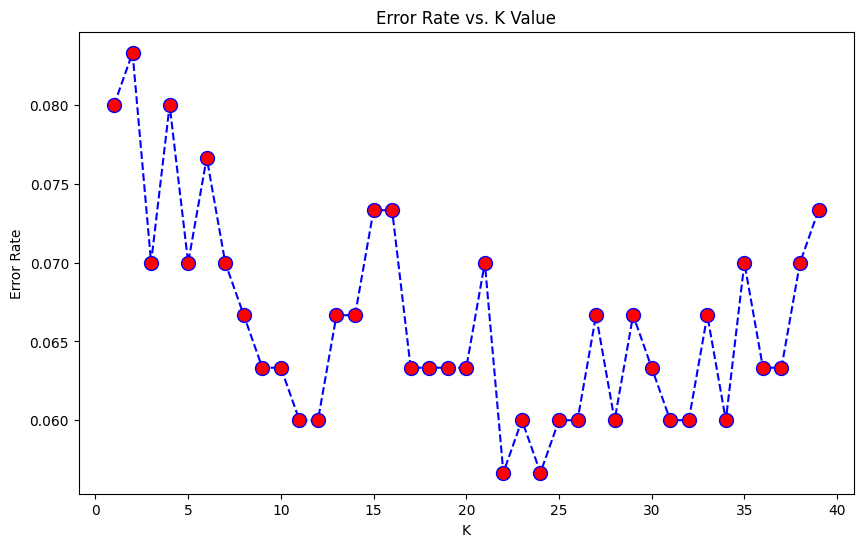

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Observation :- With Increse in value of K ,there is slight decrease in error rate.Pick the K with nominal error rate (Note : Try to pick K as samller as possible to avoid error rate with new data sets)

In [70]:
knn=KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
k_predict=knn.predict(X_test)
print(classification_report(y_test,k_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       145
           1       0.94      0.95      0.95       155

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

